## More image processing

Start by loading the various packages that we'll need in class today.

In [2]:
# We need to include the home directory in our path, so we can read in our own module.
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
from pathlib import Path
import matplotlib.pyplot as plt

__Load image__

In [4]:
DATA_DIR = Path("../../../CDS-VIS/img")
assert DATA_DIR.exists()

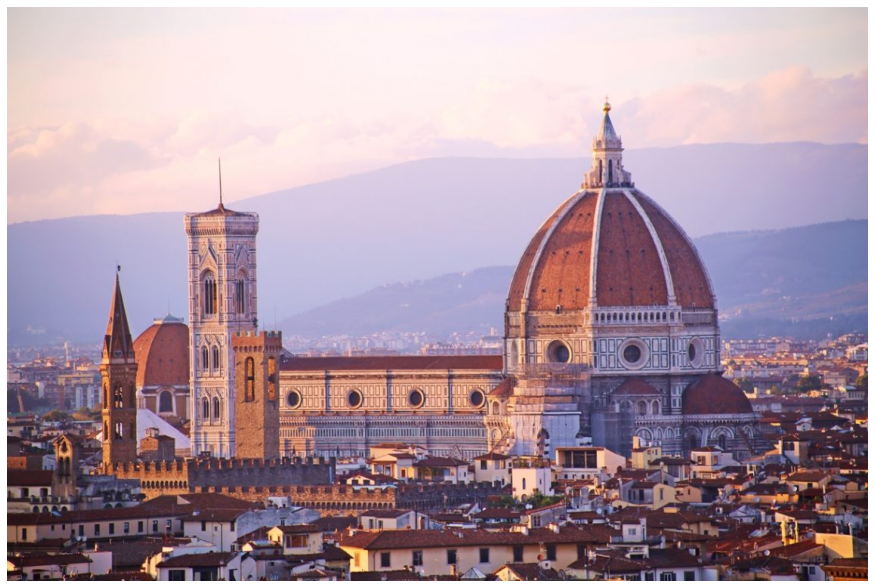

In [8]:
image = cv2.imread(str(DATA_DIR / "florence.jpg"))
jimshow(image)

## Plot colour historgrams

```cv2.calcHist([image], channels, mask, histSize, ranges[, hist[, accumulate]])```

- images : it is the source image of type uint8 or float32 represented as “[img]”.
- channels : it is the index of channel for which we calculate histogram. 
    - For grayscale image, its value is [0] and
    - color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- mask : mask image. To find histogram of full image, it is given as “None”.
- histSize : this represents our BIN count. For full scale, we pass [256].
- ranges : this is our RANGE. Normally, it is [0,256].

__Only blue channel__

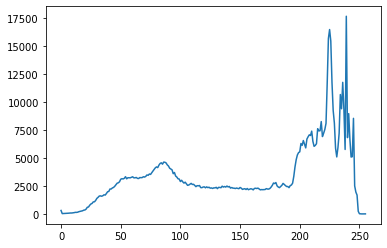

In [11]:
blue_hist = cv2.calcHist([image], [0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(blue_hist)

__Only green__

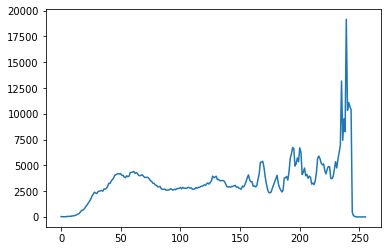

In [12]:
blue_hist = cv2.calcHist([image], [1], mask=None, histSize=[256], ranges=[0,256])
plt.plot(blue_hist)

__Only red__

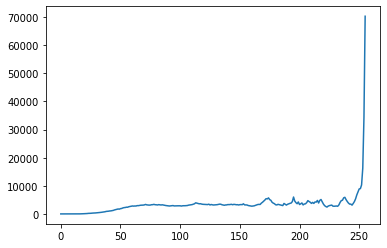

In [13]:
blue_hist = cv2.calcHist([image], [2], mask=None, histSize=[256], ranges=[0,256])
plt.plot(blue_hist)

__Split channels__

In [14]:
channels = cv2.split(image)

In [16]:
channels[0]

array([[195, 196, 196, ..., 200, 199, 199],
       [196, 196, 196, ..., 200, 199, 199],
       [196, 196, 196, ..., 198, 197, 197],
       ...,
       [ 63,  62,  66, ...,  43,  37,  34],
       [ 68,  63,  64, ...,  45,  38,  34],
       [ 54,  51,  52, ...,  30,  22,  17]], dtype=uint8)

## Plot multiple channels at the same time

In [18]:
def multi_channel_plot(img_path: Path):
    image = cv2.imread(str(img_path))
    # split channels
    channels = cv2.split(image)
    # names of colours
    color_names = ["b", "g", "r"]
    # create figure
    plt.figure()
    # add title
    plt.title(f"Multiple channels: {img_path.stem}")
    # add xlabel
    plt.xlabel("Bins")
    # add ylabel
    plt.ylabel("Number of pixels")

    # loop over our channels
    for channel, color_name in zip(channels, color_names):
        # Create a histogram
        hist = cv2.calcHist([channel], [0], None, [256], [0,256])
        # Plot histogram
        plt.plot(hist, color = color_name)
        # Set limit of x-axis
        plt.xlim([0, 256])

    # show the plot
    plt.show()

__Comparing histograms__

We start by loading a second image from the data folder.

In [ ]:
multi_channel_plot(DATA_DIR / "starry_night.jpg")
multi_channel_plot(DATA_DIR / "jefferson.jpg")

In [ ]:
# copy the same code from above

### Task 1

Take the code above and turn it into a function which can be used again on different images.



## Multidimensional histograms

__No need to code along here; I just want to show you how this works__

Now that we are working with multi-dimensional histograms, we need to keep in mind the number of bins we are using. 

In previous examples, I’ve used 256 bins for demonstration purposes. However, if we used a 256 bins for each dimension in a 2D histogram, our resulting histogram would have 256 × 256 = 65,536 separate pixel counts. Not only is this wasteful of resources, it’s not practical. 

Most applications use somewhere between 8 and 64 bins when computing multi-dimensional histograms. So we use 32 instead of 256.

In [ ]:
# Create matplotlib figure
fig = plt.figure(figsize=(20,10))
# plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
# get histogram
hist = cv2.calcHist([image[1], image[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
# create object to plot
p = ax.imshow(hist)
# set title
ax.set_title("2D Color Histogram for Green and Blue")
# plot
plt.colorbar(p)

__Adding multiple plots to one visualisation__

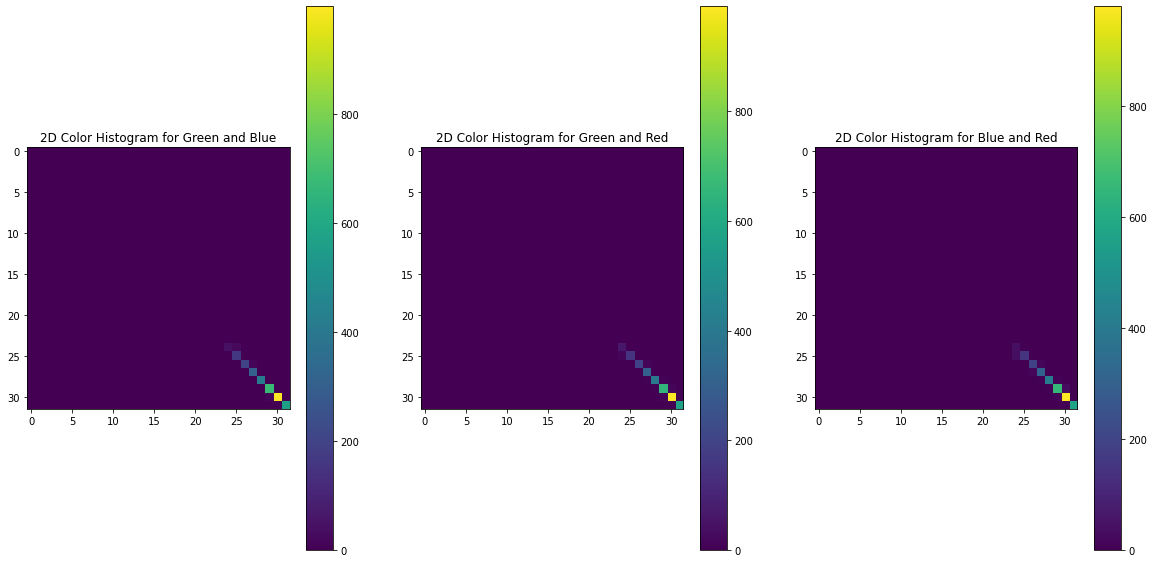

In [21]:
# Create matplotlib figure
fig = plt.figure(figsize=(20,10))

# plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([image[1], image[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist)
ax.set_title("2D Color Histogram for Green and Blue")
plt.colorbar(p)

# plot a 2D color histogram for green and red
ax = fig.add_subplot(132)
hist = cv2.calcHist([image[1], image[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist)
ax.set_title("2D Color Histogram for Green and Red")
plt.colorbar(p)

# plot a 2D color histogram for blue and red
ax = fig.add_subplot(133)
hist = cv2.calcHist([image[0], image[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist)
ax.set_title("2D Color Histogram for Blue and Red")
plt.colorbar(p)

## Comparing histograms

__Extract histograms__

__MinMax normalization__

Before comparing historgrams, we first have to normalise them to occur within a narrower ranger of values. Why do we need to do this?

We're doing to use MinMax normalisation, which we calculate in the following way for each value:

```norm_pixel = (value-min) / (max-min)```

__Comparing the first two histograms__

__Load a new image__

__Compare with image 1__

## Translation, rotation, masking

__Load image__

__Drawing__

We can draw shapes directly onto our image, in order to create a bounded box around a region of interest (ROI).

NB - this modifies the image in-place, meaning the drawn on box will stay there!

__Drawing a rectangle__

```cv2.rectangle(image, start_point, end_point, color, thickness)```

__Drawing a circle__

```cv2.circle(image, center_coordinates, radius, color, thickness)```

## Creating and using masks

__Rectangle__

__Circle__

__Bitwise AND__

__Rectangle mask__

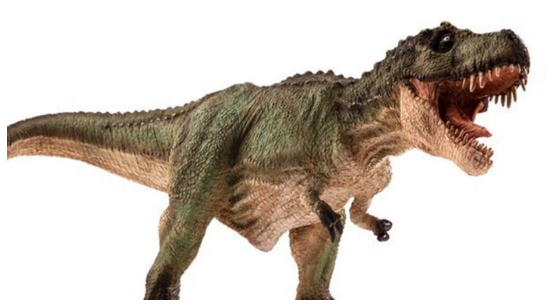

In [52]:
# reload the image
image = cv2.imread(str(DATA_DIR / "t-rex2.png"))
jimshow(image)

We first create an array of zeros the same size as our original image.

This gives us a ```numpy``` array of zeros. What would this be visually in terms of pixels?

In [53]:
# create array of zeros
zeros = np.zeros(image.shape[:2], dtype=np.uint8)

In [67]:
# define centres
h = w = 100

x1 = zeros.shape[1] // 2 - w // 2
x2 = zeros.shape[1] // 2 + w // 2
y1 = zeros.shape[0] // 2 - h // 2
y2 = zeros.shape[0] // 2 + h // 2


cv2.rectangle(zeros, (x1, y1), (x2, y2), 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [66]:
zeros.shape

(388, 714)

We then create a *mask*, where the background is black and the area inside the bounded rectangle is white.

In [ ]:
# create rectangular mask

In [56]:
# print mask just to be sure
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

We then use bitwise AND. So think about what is going to happen here.

We have a colour image with pixel intensities greater than zero; we have a mask image with black background and a filled white area.

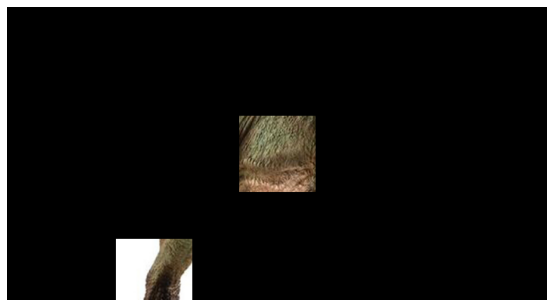

In [68]:
# bitwise AND on original image
testy = cv2.bitwise_and(image, image, mask=zeros)
jimshow(testy)

__Circular mask__

We can perform a similar process using circular masks. 

See if you can figure it out in small groups!

In [ ]:
# reload the image

In [ ]:
# create array of zeros

In [ ]:
# define centres

In [ ]:
# create circular mask

In [ ]:
# print mask just to be sure

In [ ]:
# bitwise AND on original image